## **0. Introduction**

This notebook follows after the "Logistic_Regression.iypnb" notebook. Aim of this notebook is to conduct the Support Vector Machine algorithm. 

## **1. Masking**

As in the Logistic Regression notebook, we will first load the masks, load the data and then apply the mask. I will not explain each step, because this has already been described in the aformentioned notebook.

In [1]:
import os

os.chdir("/home/jpauli/ds001506/sourcedata/sub-01/anat")
os.listdir()

['sub-01_mask_LH_FFA.nii.gz',
 'sub-01_mask_LH_hV4.nii.gz',
 'sub-01_mask_LH_HVC.nii.gz',
 'sub-01_mask_LH_LOC.nii.gz',
 'sub-01_mask_LH_PPA.nii.gz',
 'sub-01_mask_LH_V1d.nii.gz',
 'sub-01_mask_LH_V1v.nii.gz',
 'sub-01_mask_LH_V2d.nii.gz',
 'sub-01_mask_LH_V2v.nii.gz',
 'sub-01_mask_LH_V3d.nii.gz',
 'sub-01_mask_LH_V3v.nii.gz',
 'sub-01_mask_RH_FFA.nii.gz',
 'sub-01_mask_RH_hV4.nii.gz',
 'sub-01_mask_RH_HVC.nii.gz',
 'sub-01_mask_RH_LOC.nii.gz',
 'sub-01_mask_RH_PPA.nii.gz',
 'sub-01_mask_RH_V1d.nii.gz',
 'sub-01_mask_RH_V1v.nii.gz',
 'sub-01_mask_RH_V2d.nii.gz',
 'sub-01_mask_RH_V2v.nii.gz',
 'sub-01_mask_RH_V3d.nii.gz',
 'sub-01_mask_RH_V3v.nii.gz']

In [2]:
mask_img_path = '/home/jpauli/ds001506/sourcedata/sub-01/anat'
mask_img_L = os.path.join(mask_img_path,'sub-01_mask_LH_V2v.nii.gz')
mask_img_R = os.path.join(mask_img_path,'sub-01_mask_RH_PPA.nii.gz')

In [3]:
from nilearn.maskers import NiftiMasker
nifti_masker = NiftiMasker(mask_img=mask_img_R)

In [4]:
X = []
Y = []
Sessions = []
category = 1
for session in ["1","2","3","4"]:
    os.chdir('/mnt/c/Users/janos/git/sessions_new/z_maps_{}'.format(session))
    for x in os.listdir():
        if x == 'nilearn_cache':
            continue
        else:
            X.append(nifti_masker.fit_transform(x))
            Y.append(category)
            Sessions.append(session)
            category=category+1
            if category == 27:
                category = 1

In [5]:
import numpy as np
import pandas as pd

Y = np.array(Y)
Y_ses = np.array(Sessions)
df =  pd.DataFrame(np.concatenate(X))
X_ = df.to_numpy()




## **1.0 Support Vector Machine**

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_new = SelectKBest(f_classif, k=10).fit_transform(X_, Y)
X_new.shape

(104, 10)

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2,random_state=42)

In [8]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)

In [9]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
clf = svm.SVC(C = 0.01, kernel='linear') # Linear Kernel

clf.fit(X_train_s, y_train)

y_pred = clf.predict(scaler.transform(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       2.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00    

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [10]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf','sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid,cv = 2,refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_s, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.071 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.098 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.071 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.049 total time=   0.0s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.071 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.048 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.049 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.071 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.098 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.048 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

[CV 1/2] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.071 total time=   0.0s
[CV 2/2] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.049 total time=   0.0s
[CV 1/2] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.071 total time=   0.0s
[CV 2/2] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.049 total time=   0.0s
[CV 1/2] END .....C=100, gamma=1, kernel=linear;, score=0.095 total time=   0.0s
[CV 2/2] END .....C=100, gamma=1, kernel=linear;, score=0.049 total time=   0.0s
[CV 1/2] END .......C=100, gamma=1, kernel=poly;, score=0.071 total time=   0.0s
[CV 2/2] END .......C=100, gamma=1, kernel=poly;, score=0.049 total time=   0.0s
[CV 1/2] END ........C=100, gamma=1, kernel=rbf;, score=0.071 total time=   0.0s
[CV 2/2] END ........C=100, gamma=1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 1/2] END ....C=100, gamma=1, kernel=sigmoid;, score=0.024 total time=   0.0s
[CV 2/2] END ....C=100, gamma=1, kernel=sigmoid;, score=0.073 total time=   0.0s
[CV 1/2] END ...C=100, gamma

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [11]:
#print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [12]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       2.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       2.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       2.0
          14       0.00      0.00      0.00       2.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          21       0.00    

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(res

In [13]:
y_train

array([ 4, 23, 25, 19, 21, 16, 17, 15, 10,  8, 12, 26,  1,  3,  2,  6, 11,
        5, 14, 10, 17, 15,  9,  8, 18, 17, 18,  2, 20,  7, 26, 22, 24, 14,
       25,  4, 18, 13,  9,  4,  7, 16, 11, 13,  6,  3, 25, 19, 21, 22, 10,
       23, 19, 16,  7, 23, 12,  6, 24,  7, 20,  8, 12, 24, 12,  4,  2,  1,
       22,  3, 24, 10, 17, 23,  9,  5, 21,  9, 20, 15, 15, 26, 25])

In [14]:
grid.predict(X_train_s)

array([19, 12, 25, 19, 17, 16, 17, 15, 10, 23,  9, 15, 12, 26, 25,  3, 25,
        5, 15, 10,  9, 24,  9, 15, 21, 17, 23, 15,  9,  7, 26, 15, 24, 12,
        7,  4,  9, 19,  9,  4,  7, 25, 15, 18, 15,  4, 25, 25, 21, 22, 17,
       23, 25, 22,  7,  2, 18, 17, 10, 25, 17,  4, 12, 24, 22,  4, 17,  1,
       12, 25, 24, 10, 17, 23,  9,  5, 12, 15, 17,  9, 23, 26, 17])

In [15]:
Y_unique = np.unique(Y)
Y_unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26])

In [16]:
np.random.shuffle(Y)
y_train = []
y_test = []


for category in Y:
        if len(y_test) == len(Y_unique):
            y_train.append(category)
        else:
            y_test.append(category)
            if y_test.count(category) > 1:
                y_test.remove(category)
                y_train.append(category)
                continue
            
                

In [17]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [18]:
X_train, X_test = train_test_split(X_new, test_size=0.25, random_state=42)

In [19]:
X_train_s_new = scaler.fit_transform(X_train)

In [20]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf','sigmoid']} 
  
grid = GridSearchCV(svm.SVC(), param_grid,cv = 2,refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train_s_new, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.026 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.026 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.051 total time=   0.0s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.051 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.026 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.026 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.026 total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.026 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.026 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

[CV 1/2] END .....C=100, gamma=1, kernel=linear;, score=0.077 total time=   0.0s
[CV 2/2] END .....C=100, gamma=1, kernel=linear;, score=0.026 total time=   0.0s
[CV 1/2] END .......C=100, gamma=1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .......C=100, gamma=1, kernel=poly;, score=0.051 total time=   0.0s
[CV 1/2] END ........C=100, gamma=1, kernel=rbf;, score=0.051 total time=   0.0s
[CV 2/2] END ........C=100, gamma=1, kernel=rbf;, score=0.026 total time=   0.0s
[CV 1/2] END ....C=100, gamma=1, kernel=sigmoid;, score=0.000 total time=   0.0s
[CV 2/2] END ....C=100, gamma=1, kernel=sigmoid;, score=0.026 total time=   0.0s
[CV 1/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.077 total time=   0.0s
[CV 2/2] END ...C=100, gamma=0.1, kernel=linear;, score=0.026 total time=   0.0s
[CV 1/2] END .....C=100, gamma=0.1, kernel=poly;, score=0.000 total time=   0.0s
[CV 2/2] END .....C=100, gamma=0.1, kernel=poly;, score=0.051 total time=   0.0s
[CV 1/2] END ......C=100, ga

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [21]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.07      1.00      0.12         1
          18       0.00    

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [22]:
grid.score(scaler.transform(X_test), y_test)

0.07692307692307693

In [23]:
grid.score(X_train_s_new, y_train)

0.9615384615384616

In [2]:
import os
os.chdir("/mnt/c/Users/janos/git/proj-638b2a566881d56fbfac223e/sub-02.ses-imagery01/dt-neuro-func-task.tag-imagery.tag-preprocessed.run-01.id-63b886103aaf91d15e1cd447")
os.listdir()

['bold.nii.gz', '_info.json']

In [3]:
import pandas as pd
from nilearn.image import mean_img
from nilearn.plotting import plot_img

In [4]:
mean_img_ = mean_img("sub-02_ses-imagery01_run-01_tag-imagery_tag-preprocessed_task-imagery_desc-63b886103aaf91d15e1cd447_bold.nii.gz")
plot_img(mean_img_)

ValueError: File not found: 'sub-02_ses-imagery01_run-01_tag-imagery_tag-preprocessed_task-imagery_desc-63b886103aaf91d15e1cd447_bold.nii.gz'

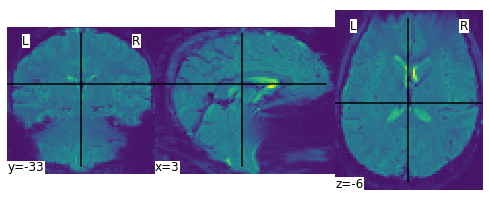

In [5]:
mean_img_ = mean_img("bold.nii.gz")
plot_img(mean_img_)
